# Regression:
    Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). The most common form of regression analysis is linear regression, in which a researcher finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Gapminder.csv')

In [7]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [8]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

In [9]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

In [10]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [11]:
# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [12]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [13]:
import seaborn as sns

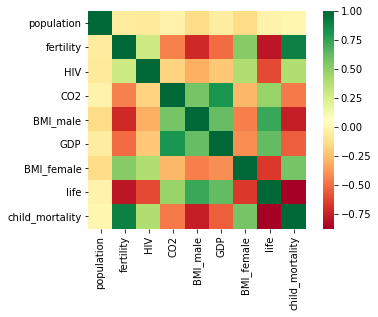

In [14]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [18]:
# Create the regressor: reg
reg = LinearRegression()

In [19]:
# Fitting the regressor to the training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predicting on the test data: y_pred
y_pred = reg.predict(X_test)

In [22]:
# Computing and printing R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5506386342908545
Root Mean Squared Error: 5.774506812035813


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Creating a linear regression
reg = LinearRegression()

In [25]:
#Computing 5-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [26]:
#Printing the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.6168819644425119


In [27]:
#Performing 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

0.6294715754653507


In [28]:
#Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.5883937741571185


## Regularized Regression

In [29]:
from sklearn.linear_model import Lasso

In [30]:
#Instantiating a lasso regressor
lasso = Lasso(alpha=0.4, normalize=True)

In [31]:
#Fitting the regressor to the data
lasso.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [32]:
#Computing and printing the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-1.51388042]


REGULARIZATION II: Ridge

In [34]:
from sklearn.linear_model import Ridge

In [35]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [36]:
#Setting up the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [37]:
#Creating a ridge regressor
ridge = Ridge(normalize=True)

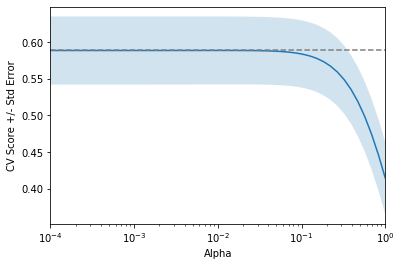

In [38]:
#Computing the scores over range of alphas, specify the alpha value to use
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)